In [1]:
"""The purpose of this script is to show BSG how to create a batch ML model.  It will operate on plenty of assumptions, this is simply a template.  Ideally, this would be run daily (or more frequently) on player stats as a batch inference job."""
"""BSG can take that information and "flag" the player for further analysis."""
"""On top of the ML model on player statistics, it's reccomended to put raw physics-based heuristics.  For example, if a player's height exceeds some factor higher than the maximum height in the game, instant ban. Another example is if the player velocity exceeds terminal velocity in the game."""
"""Physics metadata can be recorded simply by keeping track of the max/min metrics in interest (speed, height, etc.)."""

'Physics metadata can be recorded simply by keeping track of the max/min metrics in interest (speed, height, etc.).'

In [2]:
"""First disclaimer: data is being randomly generated according to normal distributions within reasonable ranges based on first-hand knowledge of the game."""
# import libraries needed
import numpy as np
import pandas as pd
import names

In [122]:
NUM_PLAYERS = 100000
NUM_CHEATERS = 5000

In [123]:
# instantiate a player stats dicionary to store different randomly generated stats
player_stats = {}
cheater_stats = {}

In [124]:
names_list = []
for i in range(NUM_PLAYERS):
    names_list.append(names.get_full_name())

cheater_list = []
for i in range(NUM_CHEATERS):
    cheater_list.append(names.get_full_name())

In [125]:
player_stats["names"] = names_list
cheater_stats["names"] = cheater_list

In [126]:
def int_continuous(lower_range_of_stat, upper_range_of_stat, size):
    stat = np.random.randint(
        lower_range_of_stat,
        upper_range_of_stat,
        size=size,
    )
    stat = stat.T
    return stat

In [127]:
def gaussian(mu, sigma, size):
    stat = np.random.normal(
        mu,
        sigma,
        size=size,
    )
    stat = stat.T
    return stat

In [128]:
def log_normal(mu, sigma, size):
    stat = np.random.lognormal(
        mu,
        sigma,
        size=size,
    )
    stat = stat.T
    return stat

In [129]:
def binary_rng(size):
    stat = np.random.choice([0, 1], size=size)
    stat = stat.T
    return stat

In [130]:
player_stats["kd"] = gaussian(3.5, 1.5, NUM_PLAYERS)
cheater_stats["kd"] = gaussian(9, 3, NUM_CHEATERS)

In [131]:
player_stats["level"] = gaussian(1, 70, NUM_PLAYERS)
cheater_stats["level"] = gaussian(10, 50, NUM_CHEATERS)

In [132]:
player_stats["stash_value"] = gaussian(0, 10000000, NUM_PLAYERS )
cheater_stats["stash_value"] = gaussian(1000000, 100000000, NUM_CHEATERS)

In [133]:
player_stats["account_type"] = binary_rng(NUM_PLAYERS)
cheater_stats["account_type"] = binary_rng(NUM_CHEATERS)

In [134]:
player_stats["survival_rate"] = gaussian(.3, .1, NUM_PLAYERS)
cheater_stats ["survival_rate"] = gaussian(.7, .2, NUM_CHEATERS)

In [135]:
player_stats["avg_life_span"] = gaussian(18, 7, NUM_PLAYERS)
cheater_stats["avg_life_span"] = gaussian(25, 5, NUM_CHEATERS)

In [136]:
player_stats["account_lifetime"] = gaussian(500, 150, NUM_PLAYERS)
cheater_stats["account_lifetime"] = gaussian(100, 25, NUM_CHEATERS)

In [137]:
player_stats["longest_streak"] = gaussian(7, 2, NUM_PLAYERS)
cheater_stats["longest_streak"] = gaussian(20, 7, NUM_CHEATERS)

In [138]:
player_stats["label"] = (np.full(shape=NUM_PLAYERS, fill_value=0)).T
cheater_stats["label"] = (np.full(shape=NUM_CHEATERS, fill_value=1)).T

In [139]:
df_player = pd.DataFrame.from_dict(player_stats)
df_cheater = pd.DataFrame.from_dict(cheater_stats)

In [140]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'kd'}>,
        <Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'stash_value'}>],
       [<Axes: title={'center': 'account_type'}>,
        <Axes: title={'center': 'survival_rate'}>,
        <Axes: title={'center': 'avg_life_span'}>],
       [<Axes: title={'center': 'account_lifetime'}>,
        <Axes: title={'center': 'longest_streak'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

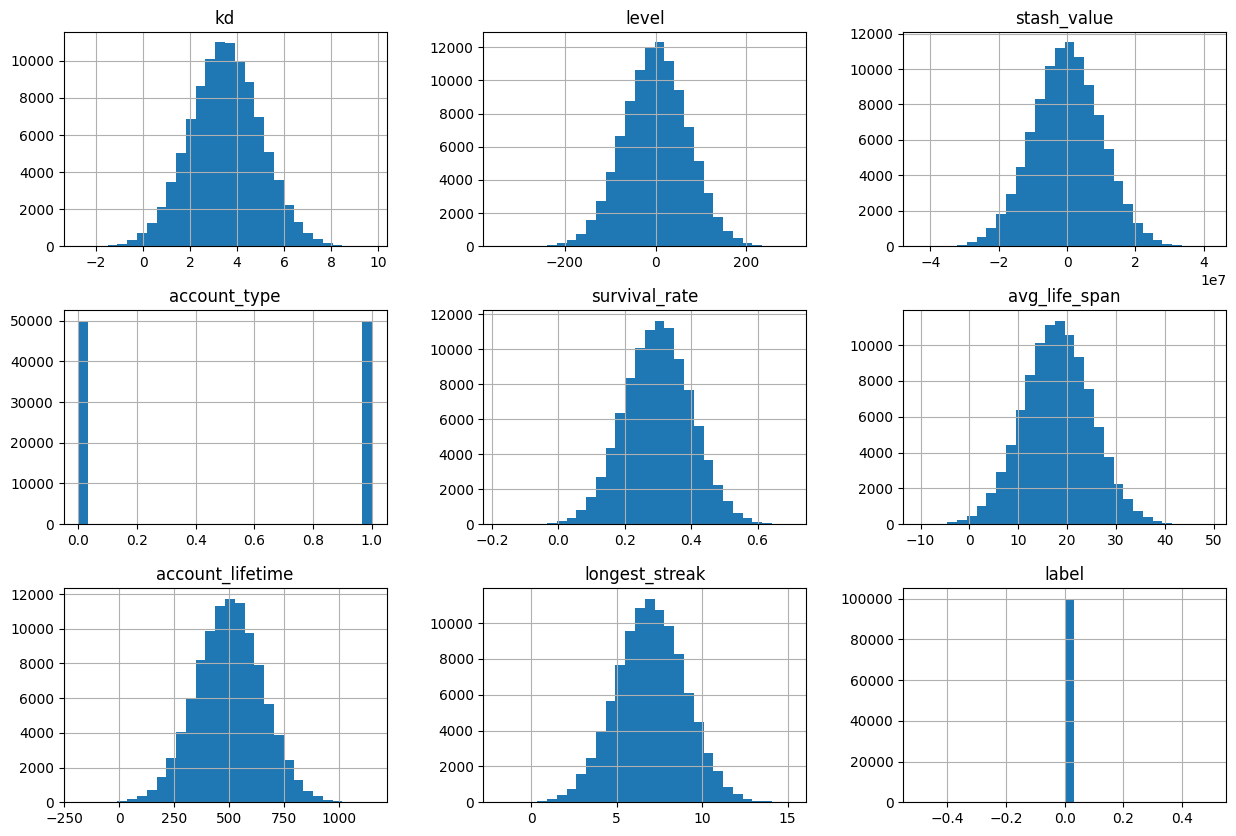

In [141]:
df_player.hist(bins=30, figsize=(15, 10))

array([[<Axes: title={'center': 'kd'}>,
        <Axes: title={'center': 'level'}>,
        <Axes: title={'center': 'stash_value'}>],
       [<Axes: title={'center': 'account_type'}>,
        <Axes: title={'center': 'survival_rate'}>,
        <Axes: title={'center': 'avg_life_span'}>],
       [<Axes: title={'center': 'account_lifetime'}>,
        <Axes: title={'center': 'longest_streak'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

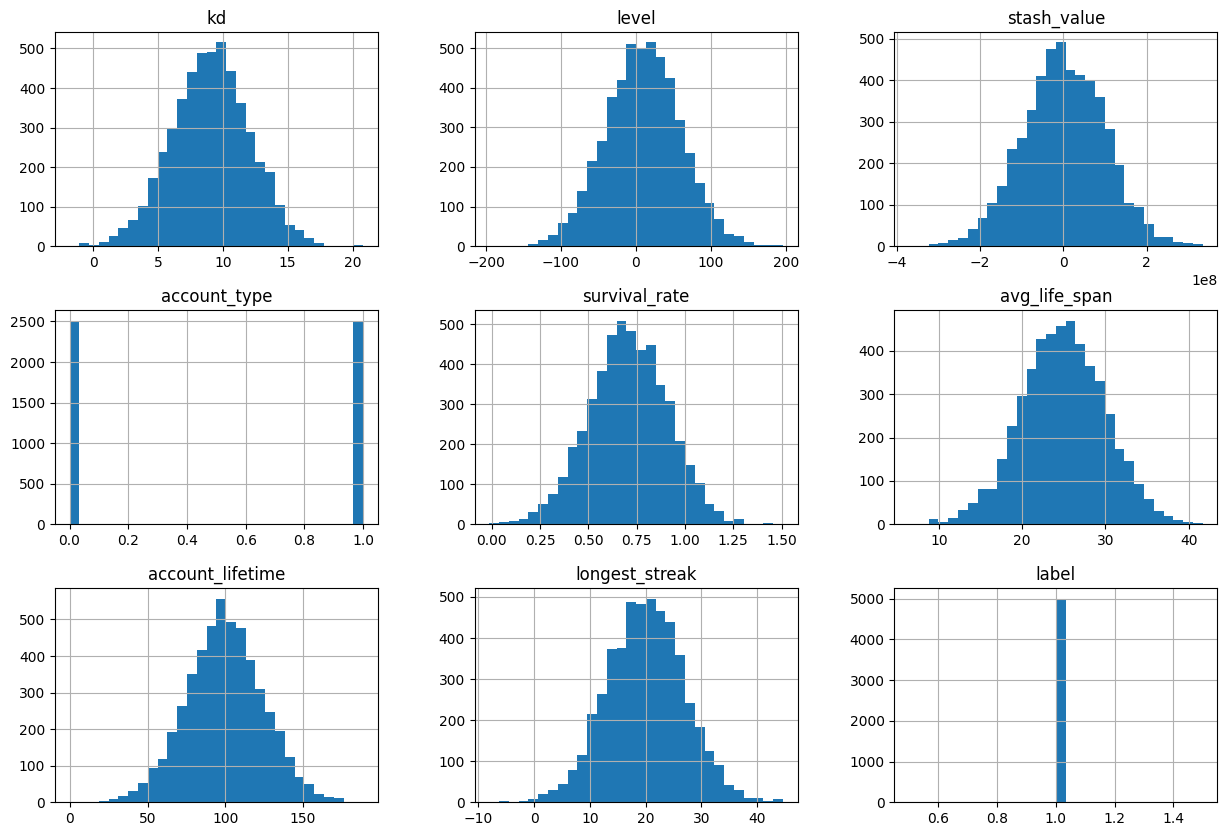

In [142]:
df_cheater.hist(bins=30, figsize=(15, 10))

In [143]:
df = df_player.append(df_cheater)

/var/folders/ks/nz9z_gz54sl8kl28stnkh4hr0000gn/T/ipykernel_63340/2255865097.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_player.append(df_cheater)


In [144]:
# randomly shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   names             105000 non-null  object 
 1   kd                105000 non-null  float64
 2   level             105000 non-null  float64
 3   stash_value       105000 non-null  float64
 4   account_type      105000 non-null  int64  
 5   survival_rate     105000 non-null  float64
 6   avg_life_span     105000 non-null  float64
 7   account_lifetime  105000 non-null  float64
 8   longest_streak    105000 non-null  float64
 9   label             105000 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 8.0+ MB


In [146]:
df.to_csv('data/synthetic_data.csv')

In [147]:
from sklearn.model_selection import train_test_split
X = df.drop(["names", "label"], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state=0,
)

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [149]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [150]:
y_pred = model.predict(X_test)

In [151]:
tn, fp, fn, tp =confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp


(20007, 0, 2, 991)

In [152]:
# misleading in class imabalanced datasets, baseline accuracy would be 1000/1050 = 95.2%
accuracy_score(y_test, y_pred)

0.9999047619047619

In [153]:
# ability of the classifier to not miss positive samples
precision_score(y_test, y_pred)

1.0

In [154]:
# ability of the classifier not to label as positive a sample that is negative.
recall_score(y_test, y_pred)

0.9979859013091642